In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv("/content/dis-sym-processed-categorical.csv")
df

,Disease,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,...,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,Fungal infection,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,Impetigo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
300,Impetigo,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
301,Impetigo,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
302,Impetigo,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
# finding disease prediction using basic probabilty

filtered_df=[]
sym=[]
c=0
while True:
    x=input("enter symptom:")
    sym.append(x)
    c+=1
    print(c)
    if(c==1):
        filtered_df = df[df[x] == 1]
    else:
        filtered_df = filtered_df[filtered_df[x] == 1]
    # Count the number of '1' values in each row
    row_counts = (filtered_df == 1).sum(axis=1)

    # Display the DataFrame with row counts
    filtered_df['Row_Counts'] = row_counts
    filtered_df['prob'] = round((c / row_counts) * 100, 4)
    if(filtered_df.empty):
        print(sym)
        break
    y=input("enter 'no' to stop writing symptoms:")
    if(y=='no'):
        # Select the row with the highest 'prob' value for each unique 'Disease'
        selected_rows = filtered_df.loc[filtered_df.groupby('Disease')['prob'].idxmin()]

        cols_to_print = ['Disease', 'prob']

        print("for these symptoms:",sym)
        # Iterate through the DataFrame and print selected columns
        for _, row in selected_rows.iterrows():
            print("u may have ---"," --- with probability ---".join(str(row[col]) for col in cols_to_print),"%")
        break


enter symptom: itching


1


enter 'no' to stop writing symptoms: no


for these symptoms: ['itching']
u may have --- Chicken pox --- with probability ---10.0 %
u may have --- Chronic cholestasis --- with probability ---14.2857 %
u may have --- Drug Reaction --- with probability ---20.0 %
u may have --- Fungal infection --- with probability ---25.0 %
u may have --- Hepatitis B --- with probability ---10.0 %
u may have --- Jaundice --- with probability ---12.5 %


In [2]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split


X = df.drop(['Disease'],axis=1)
y = df['Disease']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# rfmodel = RandomForestClassifier(max_depth=5, max_features='log2', max_leaf_nodes=3, n_estimators=100)
rfmodel = RandomForestClassifier()

rfmodel.fit(X_train, y_train)
y_pred = rfmodel.predict(X_test)

# Train Accuracy vs. Test Accuracy:
# Compare the performance metrics (e.g., accuracy, precision, recall) on the training set and the test set.
# Significant discrepancies where the training performance is much higher than the test performance can indicate overfitting.

from sklearn.metrics import accuracy_score

# Predict on training and test sets
y_train_pred = rfmodel.predict(X_train)
y_test_pred = rfmodel.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


# Cross-Validation Scores: Use cross-validation to assess the model's performance on different subsets of the data.
# If the performance is significantly better on the training folds compared to the validation folds, it may suggest overfitting.

from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rfmodel, X, y, cv=5)  # 5-fold cross-validation

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")


Train Accuracy: 1.0000
Test Accuracy: 1.0000
Cross-Validation Scores: [0.96721311 1.         1.         0.98360656 1.        ]
Mean CV Score: 0.9902


Feature importances:
                   Feature  Importance
26             high_fever    0.026424
28                fatigue    0.024496
0                 itching    0.022102
60             mild_fever    0.021705
16       loss_of_appetite    0.020028
..                    ...         ...
83           bloody_stool    0.001547
82    pain_in_anal_region    0.001517
90            weight_gain    0.000829
91   cold_hands_and_feets    0.000786
109    pus_filled_pimples    0.000690

[122 rows x 2 columns]
Important features:
 26               high_fever
28                  fatigue
0                   itching
60               mild_fever
16         loss_of_appetite
              ...          
19      burning_micturition
96      swollen_extremeties
61      swelled_lymph_nodes
39              dehydration
73    distention_of_abdomen
Name: Feature, Length: 86, dtype: object


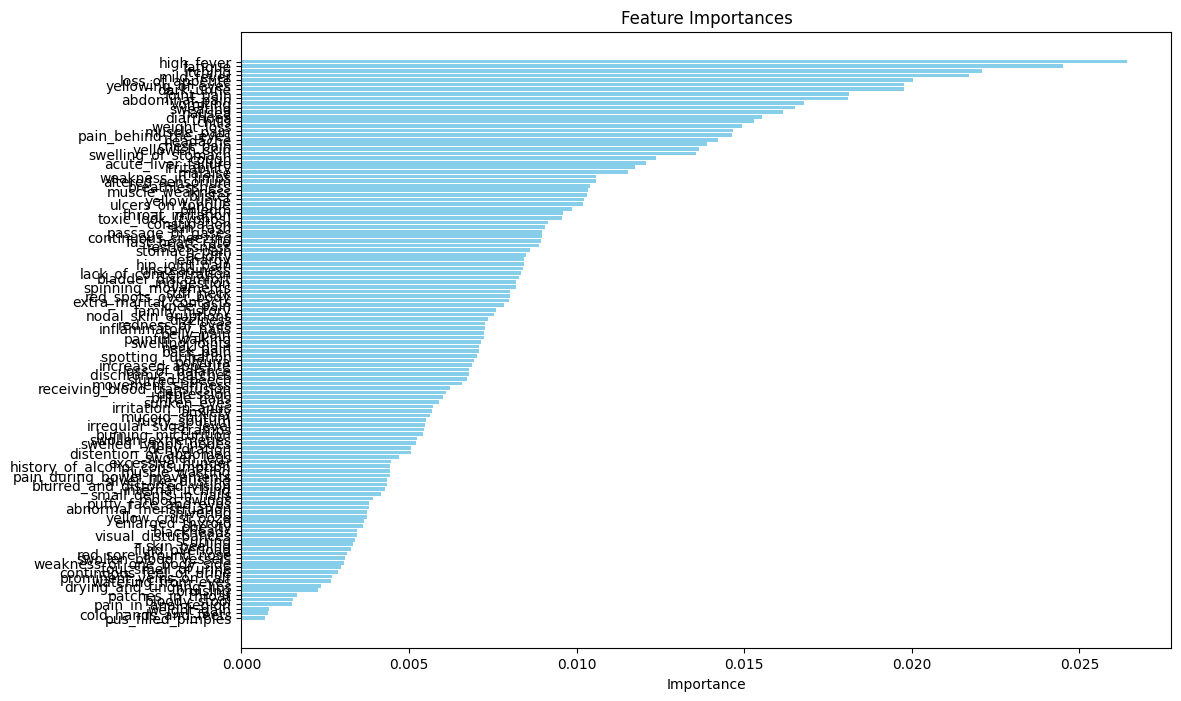

Number of important features: 86


In [3]:
# Inspect Feature Importances: If some features have very high importance while others have negligible importance,
# it might indicate that the model is overly reliant on specific features, which can lead to overfitting.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'rfmodel' is your trained Random Forest model
importances = rfmodel.feature_importances_

# Assuming 'X' is your DataFrame containing features
feature_names = X.columns

# Create a DataFrame of feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print("Feature importances:\n", importance_df)

# Define a threshold or percentage to filter features
# Example: keep features with importance above a certain threshold
threshold = 0.005 # Example threshold
important_features = importance_df[importance_df['Importance'] > threshold]['Feature']

# Example: keep top N features
# top_n = 20
# important_features = importance_df.head(top_n)['Feature']

print("Important features:\n", important_features)

# Filter the original DataFrame to keep only the important features, excluding 'Disease'
# Ensure 'Disease' column remains in the DataFrame
if 'Disease' in X.columns:
    important_features = [feature for feature in important_features if feature != 'Disease']

filtered_X = X[important_features]

# Optionally, train the model again with the reduced set of features
# rfmodel.fit(filtered_X, y)
# y_pred = rfmodel.predict(filtered_X)
# print("New model performance:\n", accuracy_score(y, y_pred))

# Visualize feature importances after removal
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

print(f"Number of important features: {len(important_features)}")


In [4]:
# List of all columns in the DataFrame
a = list(df.columns)

# List of columns to keep
important_features = list(important_features)  # Ensure it is a list
important_features.append('Disease')

to_drop=list()

for i in a:
    if i not in important_features:
        to_drop.append(i)

print("Columns to drop:", to_drop)

Columns to drop: ['shivering', 'watering_from_eyes', 'internal_itching', 'muscle_wasting', 'patches_in_throat', 'blurred_and_distorted_vision', 'obesity', 'excessive_hunger', 'visual_disturbances', 'weakness_of_one_body_side', 'history_of_alcohol_consumption', 'fluid_overload', 'pain_during_bowel_movements', 'pain_in_anal_region', 'bloody_stool', 'bruising', 'swollen_legs', 'swollen_blood_vessels', 'prominent_veins_on_calf', 'weight_gain', 'cold_hands_and_feets', 'mood_swings', 'puffy_face_and_eyes', 'enlarged_thyroid', 'abnormal_menstruation', 'drying_and_tingling_lips', 'pus_filled_pimples', 'blackheads', 'scurring', 'foul_smell_of urine', 'continuous_feel_of_urine', 'skin_peeling', 'silver_like_dusting', 'small_dents_in_nails', 'red_sore_around_nose', 'yellow_crust_ooze']


In [5]:
df_reduced = df.drop(columns=to_drop)
df_reduced

,Disease,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,chills,stomach_pain,acidity,ulcers_on_tongue,...,knee_pain,hip_joint_pain,swelling_joints,painful_walking,movement_stiffness,spinning_movements,unsteadiness,bladder_discomfort,inflammatory_nails,blister
0,Fungal infection,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,Impetigo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300,Impetigo,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
301,Impetigo,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
302,Impetigo,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
from sklearn.model_selection import train_test_split


X = df_reduced.drop(['Disease'],axis=1)
y = df_reduced['Disease']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


# rfmodel = RandomForestClassifier(max_depth=5, max_features='log2', max_leaf_nodes=3, n_estimators=100)
rfmodel = RandomForestClassifier()

rfmodel.fit(X_train, y_train)
y_pred = rfmodel.predict(X_test)

# # accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


# Perform cross-validation
cv_scores = cross_val_score(rfmodel, X, y, cv=5)
print(cv_scores)
mean_cv_accuracy = cv_scores.mean()
print("Cross-validated accuracy:", mean_cv_accuracy)

# import joblib
#Save the model to a joblib file
# joblib.dump(rfmodel, 'pred-dis.joblib')

# import pickle
# with open('pred-dis.pkl', 'wb') as file:
#     pickle.dump(rfmodel, file)

from sklearn.metrics import accuracy_score, confusion_matrix

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

[0.96721311 0.91803279 0.93442623 0.95081967 0.95      ]
Cross-validated accuracy: 0.9440983606557378
Confusion Matrix:
[[2 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]


In [7]:
# Train Accuracy vs. Test Accuracy:
# Compare the performance metrics (e.g., accuracy, precision, recall) on the training set and the test set.
# Significant discrepancies where the training performance is much higher than the test performance can indicate overfitting.

from sklearn.metrics import accuracy_score

# Predict on training and test sets
y_train_pred = rfmodel.predict(X_train)
y_test_pred = rfmodel.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 1.0000
Test Accuracy: 0.9672


In [8]:
# Cross-Validation Scores: Use cross-validation to assess the model's performance on different subsets of the data.
# If the performance is significantly better on the training folds compared to the validation folds, it may suggest overfitting.

from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rfmodel, X, y, cv=5)  # 5-fold cross-validation

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")


Cross-Validation Scores: [0.96721311 0.93442623 0.96721311 0.93442623 0.96666667]
Mean CV Score: 0.9540


In [ ]:
# Hyperparameters and Their Justifications


# n_estimators (Number of Trees)

# Recommended Value: 100–500
# Reasoning: A larger number of trees generally improves the model's performance by reducing variance and avoiding overfitting.
#             With 122 features, having a moderate to large number of trees helps ensure that the ensemble of trees captures complex interactions between symptoms.
#             However, very large numbers can lead to increased computation time with diminishing returns. Start with 100 and increase if necessary.


# max_depth (Maximum Depth of Trees)

# Recommended Value: 10–30
# Reasoning: Given the potentially high number of symptoms (features), you might start with deeper trees to capture complex patterns.
#            However, deeper trees can overfit, especially if the dataset is not very large. Setting a maximum depth helps control this.
#            A depth of 10-30 provides a good balance between capturing detail and preventing overfitting.


# min_samples_split (Minimum Samples Required to Split an Internal Node)

# Recommended Value: 2–10
# Reasoning: With 122 symptoms, a higher min_samples_split value can prevent the model from creating splits based on very few samples,
#            which might help in reducing overfitting.
#            A starting value of 2 (which allows splits on nodes with just one sample) can be increased if the model shows signs of overfitting.


# min_samples_leaf (Minimum Samples Required at a Leaf Node)

# Recommended Value: 1–10
# Reasoning: Setting a minimum number of samples per leaf node helps to avoid creating leaves that capture noise.
#            For a dataset with 122 symptoms, starting with 1 and
#            increasing if needed can help in generalizing better by preventing very specific splits.


# max_features (Number of Features to Consider for Each Split)

# Recommended Value: "sqrt" or "log2"
# Reasoning: With 122 features, setting max_features to "sqrt" (which is the square root of the number of features, approximately 11)
#               or "log2" (which is about 7) helps to ensure each tree considers a subset of features, which promotes diversity among trees
#               and reduces overfitting.


In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100,  300,  500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 6],
    'max_features': ['sqrt','log2']
}

# Initialize the Random Forest model
rf = RandomForestClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2,
                           scoring='accuracy')

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Display the best parameters
print("Best Parameters:\n", best_params)

# Evaluate the model
y_pred = best_model.predict(X_test)
print("Accuracy Score:\n", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters:
 {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy Score:
 0.9672131147540983
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         2
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       0.67      0.67      0.67         3
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       0.75      1.00      0.86         3
                       Bronchial Asthma       1.00      1.00      1.00         3
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         3
                

In [44]:
a=list(df_reduced.iloc[0])[1:]
a

[1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [45]:
print(a)

[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [46]:
y_pred = best_model.predict([a])
y_pred

array(['Fungal infection'], dtype=object)

In [50]:
import joblib
from joblib import dump , load


probabilities = best_model.predict_proba([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

])
disease_probabilities = dict(zip(best_model.classes_, probabilities[0]))

top_n = 5  # Number of top probabilities to display
sorted_probabilities = sorted(disease_probabilities.items(), key=lambda x: x[1], reverse=True)[:top_n]

# disease_df = pd.read_csv('models/disease_description.csv')
# precaution_df = pd.read_csv('models/disease_precaution.csv')


count = 0
print("top 5 diseases you may have with corresponding probability:")
print('_______________________________________________________________________________')
for disease, probability in sorted_probabilities:
    if probability > 0:
        print(f"Probability of having '{disease}': {int(probability*100)}%")

        # #Filter the DataFrame to retrieve the description of the predicted disease
        # predicted_disease_description = disease_df[disease_df['Disease'] == disease]['Symptom_Description']
        # predicted_disease_precautions = precaution_df[precaution_df['Disease'] == disease]

        # #Print the description of the disease
        # if not predicted_disease_description.empty:
        #     print("DESCRIPTION: ",predicted_disease_description.values[0])
        # else:
        #     print("Description not found for the predicted disease.")

        # print('\n')
        # if not predicted_disease_precautions.empty:
        #     print('PRECAUTIONS:')
        #     for column in ['Symptom_precaution_0', 'Symptom_precaution_1', 'Symptom_precaution_2', 'Symptom_precaution_3']:
        #         precaution = predicted_disease_precautions[column].values[0]
        #         print(precaution)
        # else:
        #     print("Precautions not found for the predicted disease.")

#         print('\n')

        if(probability*100)<50:
            print('since the probability if LESS THAN 50---WE RECOMMEND TO CONSULT A DOCTER---for a better conformation')
        count += 1
        print('_______________________________________________________________________________')
        if count == top_n:
            break

top 5 diseases you may have with corresponding probability:
_______________________________________________________________________________
Probability of having 'Allergy': 64%
_______________________________________________________________________________
Probability of having 'AIDS': 5%
since the probability if LESS THAN 50---WE RECOMMEND TO CONSULT A DOCTER---for a better conformation
_______________________________________________________________________________
Probability of having 'Acne': 5%
since the probability if LESS THAN 50---WE RECOMMEND TO CONSULT A DOCTER---for a better conformation
_______________________________________________________________________________
Probability of having 'Common Cold': 4%
since the probability if LESS THAN 50---WE RECOMMEND TO CONSULT A DOCTER---for a better conformation
_______________________________________________________________________________
Probability of having 'Dimorphic hemmorhoids(piles)': 4%
since the probability if LESS THAN 50

In [40]:
df_reduced[df_reduced['Disease']=="Allergy"]

,Disease,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,chills,stomach_pain,acidity,ulcers_on_tongue,...,knee_pain,hip_joint_pain,swelling_joints,painful_walking,movement_stiffness,spinning_movements,unsteadiness,bladder_discomfort,inflammatory_nails,blister
5,Allergy,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Allergy,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Allergy,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Allergy,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Allergy,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
import joblib

joblib.dump(best_model, 'pred-dis.joblib')

['pred-dis.joblib']

In [61]:
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM model with default parameters
svm_model = svm.SVC(probability=True)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy Score:\n", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score:
 0.9508196721311475
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         2
                                   AIDS       0.50      1.00      0.67         1
                                   Acne       0.00      0.00      0.00         3
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         3
                       Bronchial Asthma       1.00      1.00      1.00         3
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         3
                    Chronic cholestasis       1.00      1.00      1.00         2
                                 Dengue       1.00      1.00      1.00         3
                              Diabetes        1.

In [62]:
import joblib
from joblib import dump , load


probabilities = svm_model.predict_proba([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

])
disease_probabilities = dict(zip(svm_model.classes_, probabilities[0]))

top_n = 5  # Number of top probabilities to display
sorted_probabilities = sorted(disease_probabilities.items(), key=lambda x: x[1], reverse=True)[:top_n]

# disease_df = pd.read_csv('models/disease_description.csv')
# precaution_df = pd.read_csv('models/disease_precaution.csv')


count = 0
print("top 5 diseases you may have with corresponding probability:")
print('_______________________________________________________________________________')
for disease, probability in sorted_probabilities:
    if probability > 0:
        print(f"Probability of having '{disease}': {int(probability*100)}%")

        # #Filter the DataFrame to retrieve the description of the predicted disease
        # predicted_disease_description = disease_df[disease_df['Disease'] == disease]['Symptom_Description']
        # predicted_disease_precautions = precaution_df[precaution_df['Disease'] == disease]

        # #Print the description of the disease
        # if not predicted_disease_description.empty:
        #     print("DESCRIPTION: ",predicted_disease_description.values[0])
        # else:
        #     print("Description not found for the predicted disease.")

        # print('\n')
        # if not predicted_disease_precautions.empty:
        #     print('PRECAUTIONS:')
        #     for column in ['Symptom_precaution_0', 'Symptom_precaution_1', 'Symptom_precaution_2', 'Symptom_precaution_3']:
        #         precaution = predicted_disease_precautions[column].values[0]
        #         print(precaution)
        # else:
        #     print("Precautions not found for the predicted disease.")

#         print('\n')

        if(probability*100)<50:
            print('since the probability if LESS THAN 50---WE RECOMMEND TO CONSULT A DOCTER---for a better conformation')
        count += 1
        print('_______________________________________________________________________________')
        if count == top_n:
            break

top 5 diseases you may have with corresponding probability:
_______________________________________________________________________________
Probability of having 'Acne': 8%
since the probability if LESS THAN 50---WE RECOMMEND TO CONSULT A DOCTER---for a better conformation
_______________________________________________________________________________
Probability of having 'Allergy': 4%
since the probability if LESS THAN 50---WE RECOMMEND TO CONSULT A DOCTER---for a better conformation
_______________________________________________________________________________
Probability of having 'Dimorphic hemmorhoids(piles)': 4%
since the probability if LESS THAN 50---WE RECOMMEND TO CONSULT A DOCTER---for a better conformation
_______________________________________________________________________________
Probability of having 'Psoriasis': 4%
since the probability if LESS THAN 50---WE RECOMMEND TO CONSULT A DOCTER---for a better conformation
____________________________________________________

In [ ]:
# Hyperparameters and Their Justifications:


# C (Regularization Parameter)

# Recommended Value: 0.1 to 100
# Reasoning: The parameter C controls the trade-off between achieving a low error on the training data
# and minimizing the model complexity (i.e., maximizing the margin between classes).
# A higher C value allows the model to fit the training data more precisely,
# which can reduce the margin but increase the risk of overfitting.
# A lower C value creates a larger margin and may lead to underfitting.
# For a dataset with 122 symptoms, starting with C values like 1, 10, and 100 provides a range to balance bias and variance.


# kernel (Kernel Type)

# Recommended Values: 'linear', 'rbf' (Radial Basis Function)
# Reasoning:
# Linear: Useful if the data is linearly separable.
# Given 122 features, a linear kernel might work if the relationship between features and diseases is straightforward.
# RBF: Handles non-linear data well.
# It transforms the data into a higher-dimensional space, which can capture complex relationships between symptoms and diseases.
# Given the high dimensionality of the feature space, starting with rbf is often beneficial to handle non-linearity.


# gamma (Kernel Coefficient for RBF, Polynomial, and Sigmoid Kernels)

# Recommended Values: 'scale', 'auto', or specific values like 0.001, 0.01, 0.1, 1
# Reasoning: gamma determines how far the influence of a single training example reaches.
# A high gamma value means the model will consider only the closest data points, leading to a complex
# and potentially overfitted model. A low gamma value means the model considers points farther away, which can lead to underfitting.
# The choice of 'scale' or 'auto' provides a good starting point, while specific values help fine-tune based on the complexity of the data.


In [52]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Defining parameter range for SVM
param_grid = {
    'C': [0.1, 1, 10, 20, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto'],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# Initialize the SVM model
svm_model = svm.SVC(probability=True)

# Set up the GridSearchCV with the SVM model and parameter grid
grid = GridSearchCV(estimator=svm_model, param_grid=param_grid, refit=True, verbose=3, cv=5)

# Fitting the model for grid search
grid.fit(X_train, y_train)

# Print best parameter after tuning
print("Best Parameters:\n", grid.best_params_)

# Print the best model after hyper-parameter tuning
print("Best Estimator:\n", grid.best_estimator_)

# Optionally, you can evaluate the best model on test data
y_pred = grid.best_estimator_.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.041 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.143 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.122 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.125 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.021 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.939 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.898 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.898 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.917 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.938 total time=   0.1s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.939 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=pol

In [53]:
from sklearn.metrics import accuracy_score, classification_report


# Predict on the test set using the best model
y_pred = grid.best_estimator_.predict(X_test)

# Evaluate the model
print("Accuracy Score:\n", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score:
 0.8852459016393442
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         2
                                   AIDS       0.00      0.00      0.00         1
                                   Acne       0.50      0.67      0.57         3
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       0.38      1.00      0.55         3
                       Bronchial Asthma       1.00      1.00      1.00         3
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         3
                    Chronic cholestasis       1.00      1.00      1.00         2
                                 Dengue       1.00      1.00      1.00         3
                              Diabetes        1.

In [54]:
import joblib
from joblib import dump , load


probabilities = grid.predict_proba([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

])
disease_probabilities = dict(zip(grid.classes_, probabilities[0]))

top_n = 5  # Number of top probabilities to display
sorted_probabilities = sorted(disease_probabilities.items(), key=lambda x: x[1], reverse=True)[:top_n]

# disease_df = pd.read_csv('models/disease_description.csv')
# precaution_df = pd.read_csv('models/disease_precaution.csv')


count = 0
print("top 5 diseases you may have with corresponding probability:")
print('_______________________________________________________________________________')
for disease, probability in sorted_probabilities:
    if probability > 0:
        print(f"Probability of having '{disease}': {int(probability*100)}%")

        # #Filter the DataFrame to retrieve the description of the predicted disease
        # predicted_disease_description = disease_df[disease_df['Disease'] == disease]['Symptom_Description']
        # predicted_disease_precautions = precaution_df[precaution_df['Disease'] == disease]

        # #Print the description of the disease
        # if not predicted_disease_description.empty:
        #     print("DESCRIPTION: ",predicted_disease_description.values[0])
        # else:
        #     print("Description not found for the predicted disease.")

        # print('\n')
        # if not predicted_disease_precautions.empty:
        #     print('PRECAUTIONS:')
        #     for column in ['Symptom_precaution_0', 'Symptom_precaution_1', 'Symptom_precaution_2', 'Symptom_precaution_3']:
        #         precaution = predicted_disease_precautions[column].values[0]
        #         print(precaution)
        # else:
        #     print("Precautions not found for the predicted disease.")

#         print('\n')

        if(probability*100)<50:
            print('since the probability if LESS THAN 50---WE RECOMMEND TO CONSULT A DOCTER---for a better conformation')
        count += 1
        print('_______________________________________________________________________________')
        if count == top_n:
            break

top 5 diseases you may have with corresponding probability:
_______________________________________________________________________________
Probability of having 'Psoriasis': 5%
since the probability if LESS THAN 50---WE RECOMMEND TO CONSULT A DOCTER---for a better conformation
_______________________________________________________________________________
Probability of having 'Varicose veins': 4%
since the probability if LESS THAN 50---WE RECOMMEND TO CONSULT A DOCTER---for a better conformation
_______________________________________________________________________________
Probability of having 'Dimorphic hemmorhoids(piles)': 4%
since the probability if LESS THAN 50---WE RECOMMEND TO CONSULT A DOCTER---for a better conformation
_______________________________________________________________________________
Probability of having 'Urinary tract infection': 4%
since the probability if LESS THAN 50---WE RECOMMEND TO CONSULT A DOCTER---for a better conformation
__________________________

In [64]:

from sklearn.linear_model import LogisticRegression

# Train a basic Logistic Regression model
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate the model
print("Accuracy Score:\n", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score:
 0.9836065573770492
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         2
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      0.67      0.80         3
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         3
                       Bronchial Asthma       1.00      1.00      1.00         3
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         3
                    Chronic cholestasis       1.00      1.00      1.00         2
                                 Dengue       1.00      1.00      1.00         3
                              Diabetes        1.

In [65]:
import joblib
from joblib import dump , load


probabilities = logistic_model.predict_proba([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

])
disease_probabilities = dict(zip(logistic_model.classes_, probabilities[0]))

top_n = 5  # Number of top probabilities to display
sorted_probabilities = sorted(disease_probabilities.items(), key=lambda x: x[1], reverse=True)[:top_n]

# disease_df = pd.read_csv('models/disease_description.csv')
# precaution_df = pd.read_csv('models/disease_precaution.csv')


count = 0
print("top 5 diseases you may have with corresponding probability:")
print('_______________________________________________________________________________')
for disease, probability in sorted_probabilities:
    if probability > 0:
        print(f"Probability of having '{disease}': {int(probability*100)}%")

        # #Filter the DataFrame to retrieve the description of the predicted disease
        # predicted_disease_description = disease_df[disease_df['Disease'] == disease]['Symptom_Description']
        # predicted_disease_precautions = precaution_df[precaution_df['Disease'] == disease]

        # #Print the description of the disease
        # if not predicted_disease_description.empty:
        #     print("DESCRIPTION: ",predicted_disease_description.values[0])
        # else:
        #     print("Description not found for the predicted disease.")

        # print('\n')
        # if not predicted_disease_precautions.empty:
        #     print('PRECAUTIONS:')
        #     for column in ['Symptom_precaution_0', 'Symptom_precaution_1', 'Symptom_precaution_2', 'Symptom_precaution_3']:
        #         precaution = predicted_disease_precautions[column].values[0]
        #         print(precaution)
        # else:
        #     print("Precautions not found for the predicted disease.")

#         print('\n')

        if(probability*100)<50:
            print('since the probability if LESS THAN 50---WE RECOMMEND TO CONSULT A DOCTER---for a better conformation')
        count += 1
        print('_______________________________________________________________________________')
        if count == top_n:
            break

top 5 diseases you may have with corresponding probability:
_______________________________________________________________________________
Probability of having 'Allergy': 10%
since the probability if LESS THAN 50---WE RECOMMEND TO CONSULT A DOCTER---for a better conformation
_______________________________________________________________________________
Probability of having 'Dimorphic hemmorhoids(piles)': 5%
since the probability if LESS THAN 50---WE RECOMMEND TO CONSULT A DOCTER---for a better conformation
_______________________________________________________________________________
Probability of having 'Urinary tract infection': 5%
since the probability if LESS THAN 50---WE RECOMMEND TO CONSULT A DOCTER---for a better conformation
_______________________________________________________________________________
Probability of having 'Varicose veins': 4%
since the probability if LESS THAN 50---WE RECOMMEND TO CONSULT A DOCTER---for a better conformation
___________________________

In [66]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', None],  # Regularization type
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg']  # Solvers
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, verbose=3, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and estimator
print("Best Parameters:\n", grid_search.best_params_)
print("Best Estimator:\n", grid_search.best_estimator_)

# Get the best model
best_logistic_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_logistic_model.predict(X_test)

# Evaluate the tuned model
print("Accuracy Score after tuning:\n", accuracy_score(y_test, y_pred_best))
print("Classification Report after tuning:\n", classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters:
 {'C': 0.1, 'penalty': None, 'solver': 'lbfgs'}
Best Estimator:
 LogisticRegression(C=0.1, max_iter=10000, penalty=None)
Accuracy Score after tuning:
 0.9508196721311475
Classification Report after tuning:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         2
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       0.50      0.67      0.57         3
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       0.75      1.00      0.86         3
                       Bronchial Asthma       1.00      1.00      1.00         3
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00     